## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE 239AS, Winter Quarter 2018, Prof. J.C. Kao, TAs C. Zhang and T. Xing

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

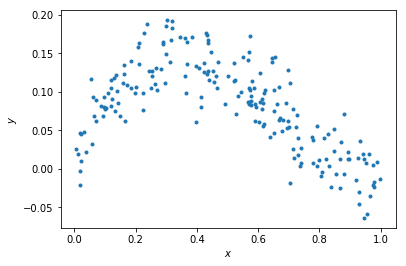

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?


(2) What is the distribution of the additive noise $\epsilon$?


### ANSWERS:

(1) $x$ is drawn from a uniform distribution with parameters $a = 0$ and $b = 1$. 

(2) $\epsilon$ is drawn from a Gaussin with $0$ mean and standard deviation $0.03$. 

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))
# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

# theta = (X^TX)^_1 (X^Ty)
x_ = xhat.T
# asserts to make sure the shapes are as expected
assert x_.T.shape[1] == x_.shape[0] and x_.T.shape[1] == y.shape[0]
theta = np.linalg.inv(x_.T.dot(x_)).dot(x_.T.dot(y))
assert theta.shape[0] == 2
# ================== #
# END YOUR CODE HERE #
# ================== #

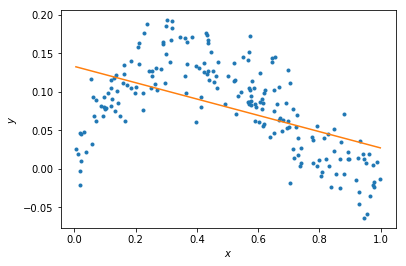

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear mode underfits the data.

(2) We can reduce underfitting py fitting a polynomial of higher degree, instead of a degree 1 polynomial (linear function).

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
# cur matrix will hold the features generated up to the current highest degree polynomial.
cur_matrix = []
cur_matrix.insert(0, np.ones_like(x))
for i in range(5):
    # fit a polynomial of degree i + 1
    # first, generate the features: x^(i + 1) down to x^0 (basically the bias units).
    cur_matrix.insert(0, np.array(x**(i + 1)))
    x_ = np.array(cur_matrix).T
    # verify shapes are as expected
    assert x_.T.shape[1] == x_.shape[0] and x_.T.shape[1] == y.shape[0]
    # least squares to find theta
    cur_theta = np.linalg.inv(x_.T.dot(x_)).dot(x_.T.dot(y))
    if i == 0:
        assert cur_theta.all() == theta.all() # the ax + b model should match the previous result
    thetas.append(cur_theta)
    # keep track of the cur_matrix in xhats for later error checking
    xhats.append(np.array(cur_matrix))

for idx, val in enumerate(thetas):
    assert len(val) == idx + 2
# ================== #
# END YOUR CODE HERE #
# ================== #

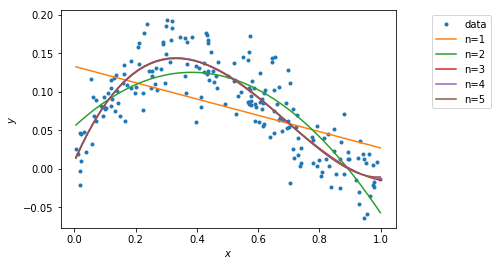

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [7]:
training_errors = []
# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

for theta, x_ in zip(thetas, xhats):
    # get the predictions and calculate MSE
    predictions = x_.T.dot(theta)
    mse = sum((predictions - y)**2)/len(y)
    training_errors.append(mse)

# ================== #
# END YOUR CODE HERE #
# ================== #
# using MSE loss: 1/N sum(y - y_pred)^2
print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.0023799610883627007, 0.001092492220926853, 0.00081696038011053683, 0.00081653537352969758, 0.00081614791955252942]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial of degree $n = 5$ has the best (lowest) training error. 

(2) Higher degree polynomials have more free parameters to fit to the dataset, so they can better fit the data. Intuitively, a higher degree allows the polynomial to "wiggle" to a much greater extent than for example a degree 1 polynomial (which is just a line), leading to a better fit on the training data.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

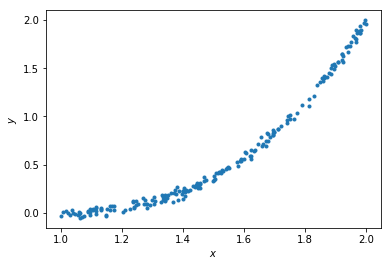

In [8]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [9]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

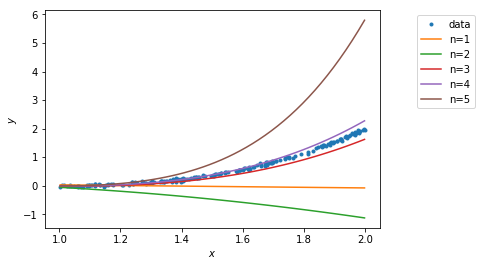

In [10]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [11]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.

for theta, x_ in zip(thetas, xhats):
    # get the preds and calc MSE
    mse = sum((y - theta.dot(x_))**2)/len(y)
    testing_errors.append(mse)
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [0.80861651845505822, 2.1319192445057884, 0.031256971083289641, 0.01187076519660833, 2.1491021807712438]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The polynomial with degree $ n = 4$. 

(2) The polynomial model of degree $n = 5$ did not generalize well because it overfit the training data. This means that it started to learn the noise in the training data, instead of the overall pattern of the data generating distribution from which x was drawn from. Since the polynomial was overfit on our training dataset, it performed worse when tested on data it had never seen before, indicating that the fit was very dependent on the data that was provided to it - if we trained it on a slightly different dataset, the model would have been quite different. This indicates that the degree $n = 5$ model had high variance. High variance models do not generalize well, because they tend to learn the intricacies of the data that they are trained on, but the actual testing data does not have these exact intricacies. 